<a href="https://colab.research.google.com/github/salma71/loan_prediction_hackathon/blob/master/Load_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [56]:
train = pd.read_csv('https://raw.githubusercontent.com/salma71/loan_prediction_hackathon/master/dataset/train.csv',na_values=np.nan)
train.shape

(614, 13)

In [57]:
train.head(50)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [28]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [29]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [30]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [31]:
correla = train.corr()
correla

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


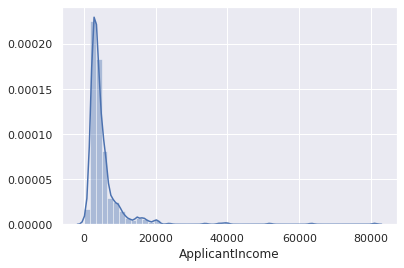

In [32]:
# unimodel visualization
# histogram
import seaborn as sns
sns.distplot(train['ApplicantIncome'], hist=True)

# X.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
# plt.show

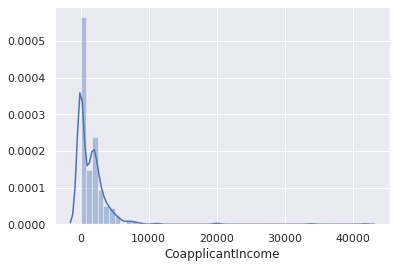

In [33]:
sns.distplot(train['CoapplicantIncome'])


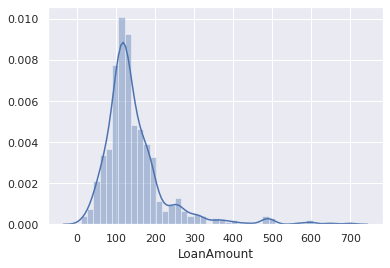

In [34]:
sns.distplot(train['LoanAmount'])


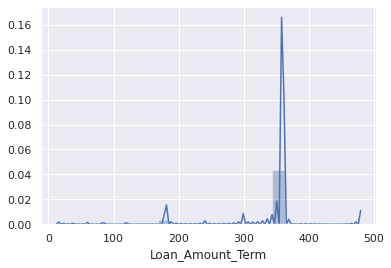

In [35]:
sns.distplot(train['Loan_Amount_Term'])

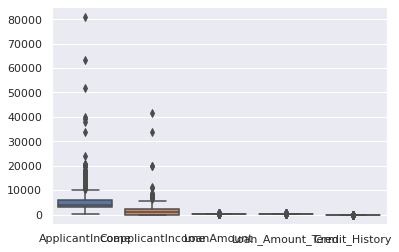

In [36]:
# some box plots
sns.boxplot(data = train.iloc[:, 1:12])

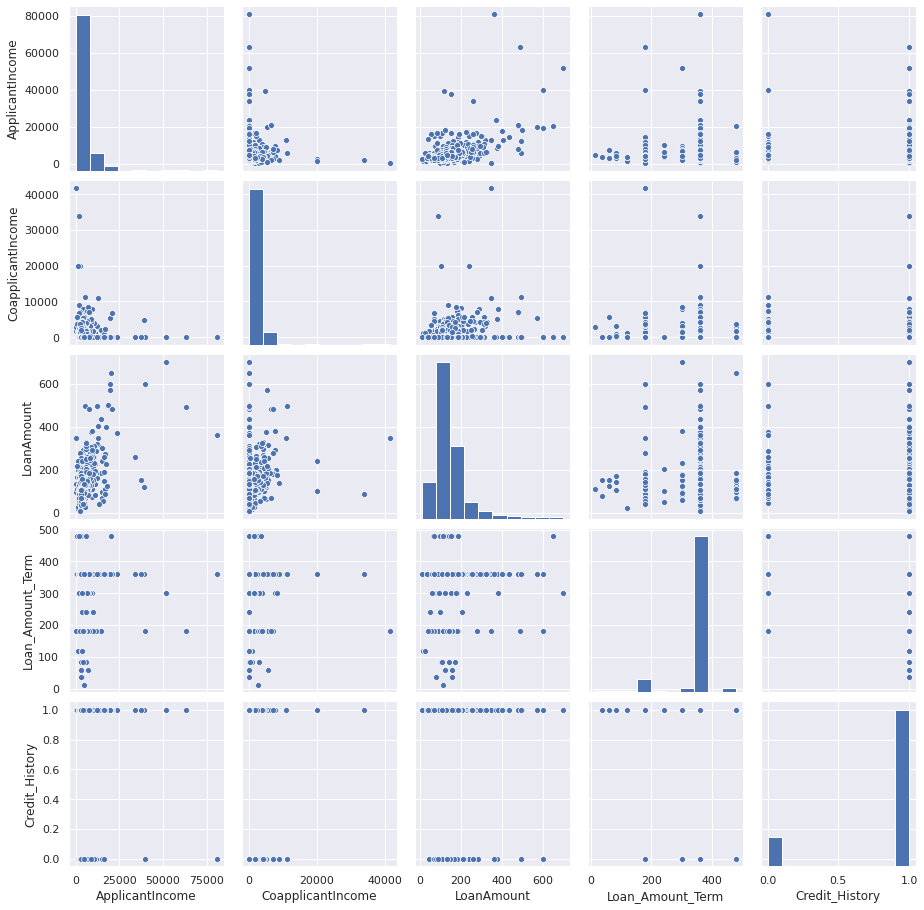

In [37]:
# multi variate plot
sns.pairplot(train.iloc[:, 1:12])

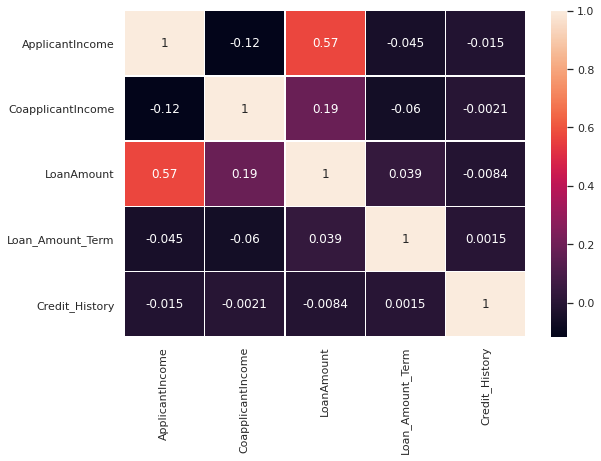

In [38]:
# heat map for correlations
sns.set()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(correla, annot=True, linewidths=0.5, ax = ax)

In [39]:
# seperate the target variable 
X_train = train.iloc[:, 1:12].values
X_train.shape

(614, 11)

In [40]:
y_train = train.iloc[:, 12]
y_train.shape

(614,)

In [41]:
# data preprocessing
# how many NAs 
total = train.isnull().sum().sort_values(ascending=False)
dtype = train.dtypes
missing_data = pd.concat([total, dtype], axis=1, keys=['total', 'dtype'])
missing_data
# data  cleaning
# feature selection 


,total,dtype
Credit_History,50,float64
Self_Employed,32,object
LoanAmount,22,float64
Dependents,15,object
Loan_Amount_Term,14,float64
Gender,13,object
Married,3,object
Loan_Status,0,object
Property_Area,0,object
CoapplicantIncome,0,float64


In [0]:
categorical_columns = []
numeric_columns = []
for c in train.columns:
    if train[c].map(type).eq(str).any(): #check if there are any strings in column
        categorical_columns.append(c)
    else:
        numeric_columns.append(c)

#create two DataFrames, one for each data type
data_numeric = train[numeric_columns]
data_categorical = pd.DataFrame(train[categorical_columns])

In [0]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
data_numeric = pd.DataFrame(imp.fit_transform(data_numeric), columns = data_numeric.columns) #only apply imputer to numeric columns


In [86]:
data_numeric.isna().sum().sort_values(ascending=False)

Credit_History       0
Loan_Amount_Term     0
LoanAmount           0
CoapplicantIncome    0
ApplicantIncome      0
dtype: int64

In [0]:
# normalizing

In [88]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_categorical = pd.DataFrame(imp.fit_transform(data_categorical), columns = data_categorical.columns) #only apply imputer to numeric columns
data_categorical.isna().sum().sort_values(ascending=False)

Loan_Status      0
Property_Area    0
Self_Employed    0
Education        0
Dependents       0
Married          0
Gender           0
Loan_ID          0
dtype: int64

In [0]:
# onehot encoding for categorical variables before joining two data again

In [0]:
#join the two masked dataframes back together
train = pd.concat([data_numeric, data_categorical], axis = 1)